# Environmental Health Inspection Results for Los Angeles County

Data from https://www.kaggle.com/meganrisdal/la-county-restaurant-inspections-and-violations/data, contains Environmental Health Inspection Results for Restaurants and Markets in Los Angeles County. 
Restaurants and markets in Los Angeles county are regularly inspected for health code violations. 
The data covers health code inspections (inspections.csv) and health code violations (violation.csv). 

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
from scipy.stats import ttest_ind

In [2]:
inspections = pd.read_csv('~/Development/Thinkful/Unit-1/Unit1_Capstone/la-county-restaurant-inspections-and-violations/inspections.csv')

violations = pd.read_csv('~/Development/Thinkful/Unit-1/Unit1_Capstone/la-county-restaurant-inspections-and-violations/violations.csv')

## Violations

In [3]:
violations.head()

,points,serial_number,violation_code,violation_description,violation_status
0,1,DAJ5UNMSF,F044,"# 44. Floors, walls and ceilings: properly bui...",OUT OF COMPLIANCE
1,4,DAT2HKIRE,F007,# 07. Proper hot and cold holding temperatures,OUT OF COMPLIANCE
2,1,DAT2HKIRE,F033,# 33. Nonfood-contact surfaces clean and in go...,OUT OF COMPLIANCE
3,1,DAT2HKIRE,F035,# 35. Equipment/Utensils - approved; installed...,OUT OF COMPLIANCE
4,1,DAQN0I8EA,F033,# 33. Nonfood-contact surfaces clean and in go...,OUT OF COMPLIANCE


In [4]:
violations.shape

(906014, 5)

The Violations Data countains information about violations found in each inspection.  Most of the columns provide information about the violations (code, description, point value) and one column (serial number) identifies which inspection that specific listing of violation was found.

### Points

In [5]:
violations.points.value_counts()

1     686405
2     162519
4      44684
0      10083
3       1214
11      1109
Name: points, dtype: int64

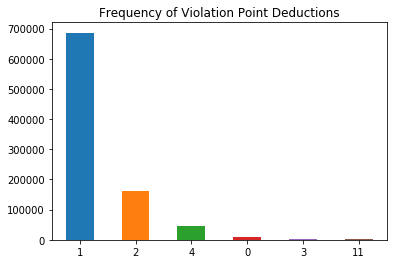

In [6]:
plt.title('Frequency of Violation Point Deductions')
pd.value_counts(violations['points']).plot.bar()
plt.xticks(rotation = 0)
plt.show()

Most violations - just over 75% - are valued at 1 point, close to 20% are valued at 2 points, less than 5% are valued 4 points.  The remaining point values - 0, 3 and 11 - make up just over 1% of violations

### Status

In [7]:
violations.violation_status.value_counts()

OUT OF COMPLIANCE    906013
VIOLATION                 1
Name: violation_status, dtype: int64

Only one entry is listed as a 'violation' while all other entries show an 'out of compliance' listing.

### Type of Violation
Code and Description

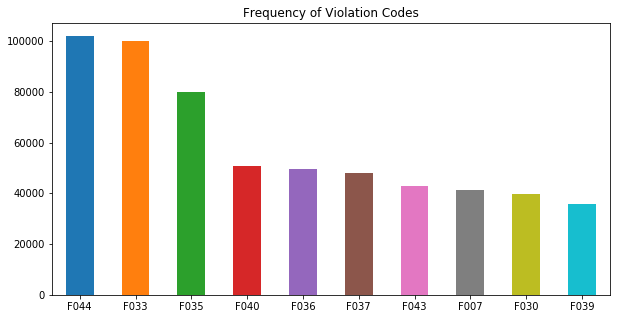

In [17]:
plt.figure(figsize=(10, 5))
plt.title('Frequency of Violation Codes')
pd.value_counts(violations['violation_code'])[:10].plot.bar()
plt.xticks(rotation = 0)
plt.show()

In [18]:
#Identify 10 most frequent violations
violations.violation_description.value_counts().nlargest(10)

# 44. Floors, walls and ceilings: properly built, maintained in good repair and clean    102012
# 33. Nonfood-contact surfaces clean and in good repair                                  100083
# 35. Equipment/Utensils - approved; installed; clean; good repair, capacity              80020
# 40. Plumbing: Plumbing in good repair, proper backflow devices                          50870
# 36. Equipment, utensils and linens: storage and use                                     49744
# 37. Adequate ventilation and lighting; designated areas, use                            48046
# 43. Premises; personal/cleaning items; vermin-proofing                                  42949
# 07. Proper hot and cold holding temperatures                                            41110
# 30. Food properly stored; food storage containers identified                            39855
# 39. Wiping cloths: properly used and stored                                             35849
Name: violation_description, dtype: int6

Here we see the ten most frequent violations.

## Inspections

In [19]:
inspections.head()

,activity_date,employee_id,facility_address,facility_city,facility_id,facility_name,facility_state,facility_zip,grade,owner_id,owner_name,pe_description,program_element_pe,program_name,program_status,record_id,score,serial_number,service_code,service_description
0,2017-05-09,EE0000593,17660 CHATSWORTH ST,GRANADA HILLS,FA0175397,HOVIK'S FAMOUS MEAT & DELI,CA,91344,A,OW0181955,JOHN'S FAMOUS MEAT & DELI INC.,"FOOD MKT RETAIL (25-1,999 SF) HIGH RISK",1612,HOVIK'S FAMOUS MEAT & DELI,ACTIVE,PR0168541,98,DAHDRUQZO,1,ROUTINE INSPECTION
1,2017-04-10,EE0000126,3615 PACIFIC COAST HWY,TORRANCE,FA0242138,SHAKEY'S PIZZA,CA,90505,A,OW0237843,"SCO, LLC",RESTAURANT (61-150) SEATS HIGH RISK,1638,SHAKEY'S PIZZA,ACTIVE,PR0190290,94,DAL3SBUE0,1,ROUTINE INSPECTION
2,2017-04-04,EE0000593,17515 CHATSWORTH ST,GRANADA HILLS,FA0007801,BAITH AL HALAL,CA,91344,A,OW0031150,SABIR MOHAMMAD SHAHID,"FOOD MKT RETAIL (25-1,999 SF) HIGH RISK",1612,BAITH AL HALAL,INACTIVE,PR0036723,95,DAL2PIKJU,1,ROUTINE INSPECTION
3,2017-08-15,EE0000971,44455 VALLEY CENTRAL WAY,LANCASTER,FA0013858,FOOD 4 LESS #306,CA,93536,A,OW0012108,"FOOD 4 LESS, INC.",RESTAURANT (0-30) SEATS HIGH RISK,1632,FOOD 4 LESS DELI/BAKERY#306,ACTIVE,PR0039905,98,DA0ZMAJXZ,1,ROUTINE INSPECTION
4,2016-09-26,EE0000145,11700 SOUTH ST,ARTESIA,FA0179671,PHO LITTLE SAIGON,CA,90701,A,OW0185167,PHO SOUTH ST INC,RESTAURANT (61-150) SEATS HIGH RISK,1638,PHO LITTLE SAIGON,ACTIVE,PR0173311,96,DA41DBXA2,1,ROUTINE INSPECTION


In [20]:
inspections.shape

(191371, 20)

In [21]:
inspections.describe()

,program_element_pe,score,service_code
count,191371.000000,191371.000000,191371.000000
mean,1629.888980,93.753306,7.078246
std,9.391426,3.845518,48.932257
min,1610.000000,54.000000,1.000000
25%,1631.000000,91.000000,1.000000
50%,1632.000000,94.000000,1.000000
75%,1635.000000,97.000000,1.000000
max,1641.000000,100.000000,401.000000


The Inspections Data countains information about each inspection.  Most of the columns provide information about the location of the inspection (including address, name of business, and type of business), with additional information about the circumstances of the inspection (date, inspector, type of inspection) and the results of the inspection (score and grade).

### Date of Inspection

In [35]:
#create method to create new variables of date elements
def ExtractDate(val, n):
    tokens = val.split('-')
    return tokens[n]

#apply date extraction method to activity date to create year, month and day variables
inspections['year'] = inspections['activity_date'].apply(ExtractDate, args=(0,))
inspections['month'] = inspections['activity_date'].apply(ExtractDate, args=(1,))
inspections['day'] = inspections['activity_date'].apply(ExtractDate, args=(2,))

inspections['year'] = pd.to_numeric(inspections['year'], errors='coerce', downcast='integer')
inspections['month'] = pd.to_numeric(inspections['month'], errors='coerce', downcast='integer')
inspections['day'] = pd.to_numeric(inspections['day'], errors='coerce', downcast='integer')

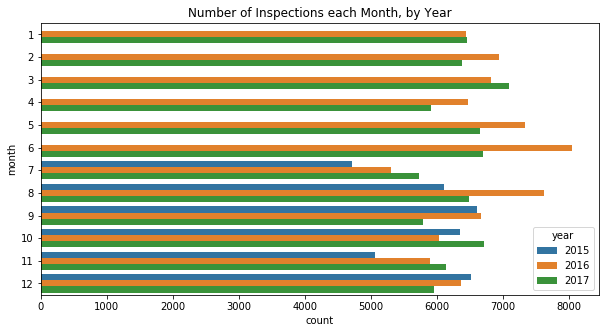

In [38]:
plt.figure(figsize=(10, 5))
plt.title('Number of Inspections each Month, by Year')
sns.countplot(y="month", hue="year", data=inspections)

In [45]:
inspections.groupby('year').size()

year
2015    35372
2016    79991
2017    76008
dtype: int64

Incomplete data is availabe for 2015, with information starting in July 2015. 2016 has about 5% more inspections than 2017

### Location

In [61]:
inspections.facility_id.value_counts().size

44031

In [106]:
inspections['facility_city'].value_counts().size

181

Several columns identify the location of the 44031 businesses: facility address, facility city, facility id, facility name, facility state, facility zip.  Here we will look at the 181 cities.

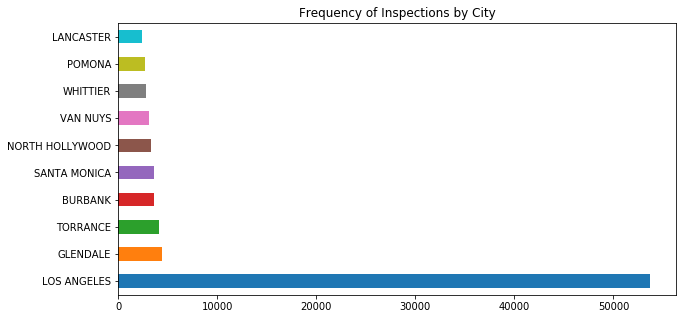

In [22]:
plt.figure(figsize=(10, 5))
plt.title('Frequency of Inspections by City')
inspections['facility_city'].value_counts()[:10].plot(kind='barh')
plt.xticks(rotation = 0)
plt.show()

In [23]:
inspections['facility_city'].value_counts().nlargest(10)

LOS ANGELES        53669
GLENDALE            4405
TORRANCE            4130
BURBANK             3626
SANTA MONICA        3601
NORTH HOLLYWOOD     3281
VAN NUYS            3083
WHITTIER            2751
POMONA              2655
LANCASTER           2371
Name: facility_city, dtype: int64

Wikipedia lists that as of 2017, about 4 million of the roughly 10 million inhabitants of LA County live in the city of Los Angeles.  This makes it no surprise that more facilities inspected - about 28% - are located in the city of Los Angeles than any other city.

### Business Type

In [24]:
inspections['pe_description'].value_counts().nlargest(5)

RESTAURANT (0-30) SEATS HIGH RISK         38881
RESTAURANT (31-60) SEATS HIGH RISK        31382
RESTAURANT (0-30) SEATS MODERATE RISK     30157
RESTAURANT (61-150) SEATS HIGH RISK       25166
FOOD MKT RETAIL (25-1,999 SF) LOW RISK    15872
Name: pe_description, dtype: int64

Business are defined as Restaurant or Retal, then by number of seats of Restaurants and Square Footage for Retail, and finally by risk - High, Moderate or Low.

In [25]:
#aggregate descriptions to new business type column
inspections['type'] = 'other'
inspections.loc[inspections['pe_description'].str.contains("RESTAURANT", na=False), 'type'] = 'restaurant'
inspections.loc[inspections['pe_description'].str.contains("RETAIL", na=False), 'type'] = 'retail'

#aggregate descriptions to new business size column
inspections['size'] = 'other'
inspections.loc[inspections['pe_description'].str.contains("0-30", na=False), 'size'] = 'small'
inspections.loc[inspections['pe_description'].str.contains("31-60", na=False), 'size'] = 'medium'
inspections.loc[inspections['pe_description'].str.contains("61-150", na=False), 'size'] = 'large'
inspections.loc[inspections['pe_description'].str.contains("151+", na=False), 'size'] = 'extra-large'
inspections.loc[inspections['pe_description'].str.contains("25-1,999", na=False), 'size'] = 'medium'
inspections.loc[inspections['pe_description'].str.contains("2,000+", na=False), 'size'] = 'large'

#aggregate descriptions to new business risk column
inspections['risk'] = 'other'
inspections.loc[inspections['pe_description'].str.contains("LOW", na=False), 'risk'] = 'low risk'
inspections.loc[inspections['pe_description'].str.contains("MODERATE", na=False), 'risk'] = 'moderate risk'
inspections.loc[inspections['pe_description'].str.contains("HIGH", na=False), 'risk'] = 'high risk'

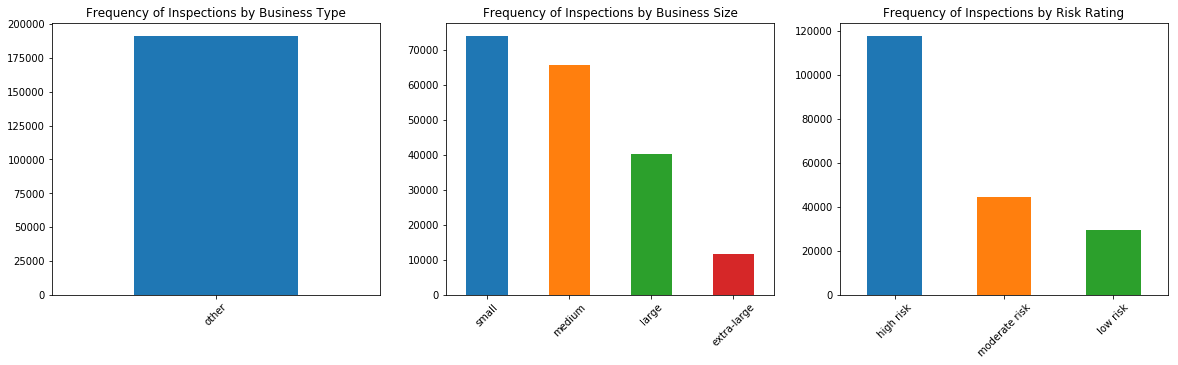

In [108]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
plt.title('Frequency of Inspections by Business Type')
pd.value_counts(inspections['type']).plot.bar()
plt.xticks(rotation = 45)

plt.subplot(1, 3, 2)
plt.title('Frequency of Inspections by Business Size')
pd.value_counts(inspections['size']).plot.bar()
plt.xticks(rotation = 45)

plt.subplot(1, 3, 3)
plt.title('Frequency of Inspections by Risk Rating')
pd.value_counts(inspections['risk']).plot.bar()
plt.xticks(rotation = 45)

plt.show()

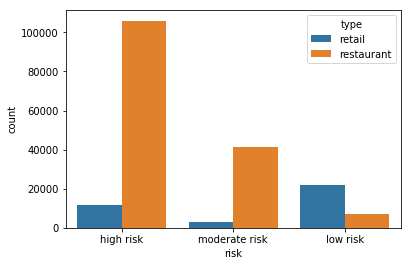

In [27]:
sns.countplot(x="risk", hue="type", data=inspections)

More inspections are conducted on Restaurants and businesses rated High Risk, so it is not surprising that Restaurants are most likely to be rated as High Risk.

### Type of Inspection

In [28]:
inspections['service_description'].value_counts()

ROUTINE INSPECTION                  188463
OWNER INITIATED ROUTINE INSPECT.      2908
Name: service_description, dtype: int64

In [29]:
#clean up service description values
inspections['type'] = 'other'
inspections.loc[inspections['service_description'].str.contains("INSPECTION", na=False), 'service_description'] = 'routine inspection'
inspections.loc[inspections['service_description'].str.contains("OWNER", na=False), 'service_description'] = 'owner initiated'

(array([0, 1]), <a list of 2 Text xticklabel objects>)

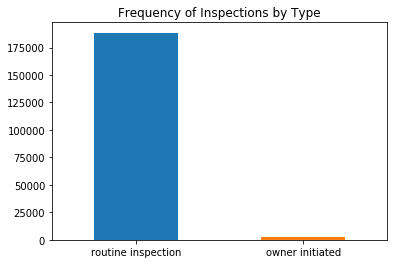

In [30]:
plt.title('Frequency of Inspections by Type')
pd.value_counts(inspections['service_description']).plot.bar()
plt.xticks(rotation = 0)

Most inspection are routine.  A comparatively small number (less than 2%) are initiated by the owner of the business.

### Scores
Scores are given letter grades (A, B, C, F) based on numeric scores up to 100.

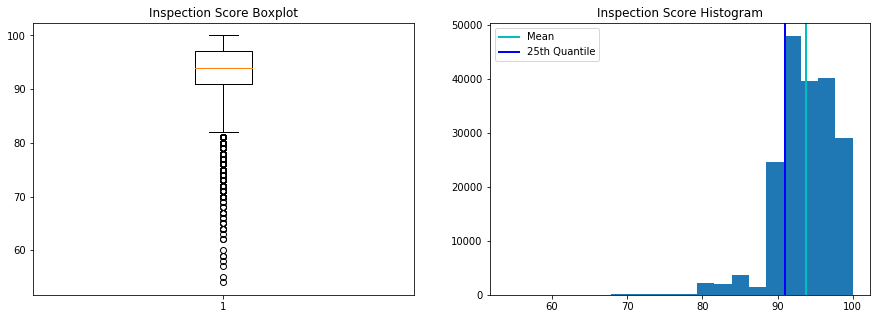

In [116]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.boxplot(inspections['score'].dropna(how = 'any'))
plt.title('Inspection Score Boxplot')

plt.subplot(1, 2, 2)
plt.hist(inspections['score'], bins=20)
plt.axvline(inspections['score'].mean(), color='c', linestyle='solid', linewidth=2, label="Mean")
plt.axvline(inspections['score'].quantile(.25), color='b', linestyle='solid', linewidth=2, label="25th Quantile")
plt.legend(loc='upper left') 
plt.title('Inspection Score Histogram')

plt.show()

Most scores are not only passing, but 'A' graded - even the 25th Quantile is over 90.

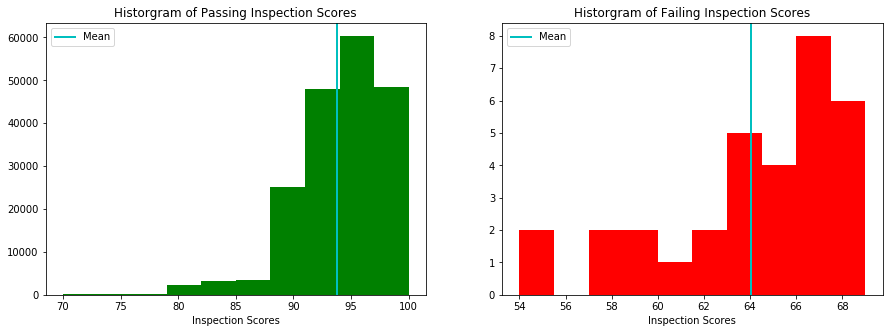

In [119]:
passing_score = inspections.loc[inspections['score'] >= 70]
failing_score = inspections.loc[inspections['score'] < 70]

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.title('Historgram of Passing Inspection Scores')
plt.hist(passing_score['score'], bins=10, color='green')
plt.axvline(passing_score['score'].mean(), color='c', linestyle='solid', linewidth=2, label="Mean")
plt.legend(loc='upper left')
plt.xlabel('Inspection Scores')

plt.subplot(1, 2, 2)
plt.title('Historgram of Failing Inspection Scores')
plt.hist(failing_score['score'], bins=10, color='red')
plt.axvline(failing_score['score'].mean(), color='c', linestyle='solid', linewidth=2, label="Mean")
plt.legend(loc='upper left')
plt.xlabel('Inspection Scores')

plt.show()

These histograms, of passing score and failing score, show the distribution of each group to be right skewed.  By looking at the scale of the y-axis (quanitity), we can see how few inspections result in a failing grade.

### Scores by Inspection Date

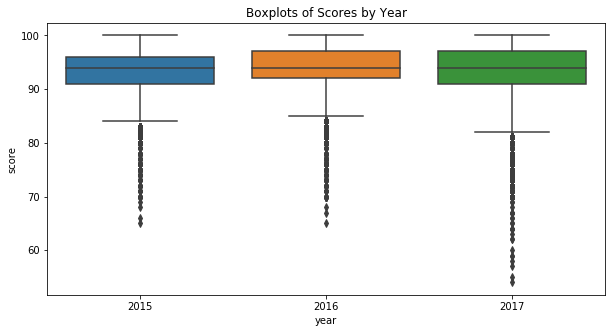

In [86]:
plt.figure(figsize=(10, 5))
plt.title('Boxplots of Scores by Year')
sns.boxplot(x="year", y="score", data=inspections)
plt.show()

Scores appear fairly consistent from year to year, but let's take a closer look by comparing 2016 to 2017 (since each year has a similar total number of inspections).

In [131]:
inspections16 = inspections.loc[inspections['year'] == 2016]
inspections17 = inspections.loc[inspections['year'] == 2017]

In [132]:
print('2016 Inspections')
inspections16['score'].describe()

2016 Inspections


count    79991.000000
mean        93.871636
std          3.662281
min         65.000000
25%         92.000000
50%         94.000000
75%         97.000000
max        100.000000
Name: score, dtype: float64

In [133]:
print('2017 Inspections')
inspections17['score'].describe()

2017 Inspections


count    76008.000000
mean        93.729410
std          4.010209
min         54.000000
25%         91.000000
50%         94.000000
75%         97.000000
max        100.000000
Name: score, dtype: float64

In [94]:
print(ttest_ind(inspections16['score'], inspections17['score'], equal_var=False))

Ttest_indResult(statistic=7.303198653426619, pvalue=2.8236409835807624e-13)


In [137]:
print('2016 Failing Scores: ', inspections16.loc[inspections16['pass'] == 'fail'].size)
print('2017 Failing Scores: ', inspections17.loc[inspections17['pass'] == 'fail'].size)

2016 Failing Scores:  81
2017 Failing Scores:  675


The means of each year differ by only about 0.14.
The standard deviations of each year differ by 0.35
The variances of each year differ by 2.67

The T-test shows a statistically significant difference between the scores from 2016 and 2017.  A closer look at the scores from each year shows that the real difference is in the standard deviation due to the greater number of failing scores in 2017 (and failing scores that were even lower than the failing scores from 2016).

## Question to resolve: 
### Can inspection scores be improved?


## Hypothesis:
### Educating business owners about most frequent violations will improve inspection scores.

## Rollout Plan

### Before Rollout
Collect information about top ten most frequently ocurring violations.  Establish references for materials and services pertaining to corrective action for these violations.
Create information materials/pamphlets defining violation, providing examples, and offering suggested corrective action.
Review materials with stakeholders.


### Initial Rollout
Assign 5% of serviced business to treatment group - that's a bit over 2000 locations of the roughly 44,000 serviced over the 2 1/2 years recorded.  Account for proportional representation of location, business type, business size, and business risk rating, as well as not currently recorded average monthly revenue.
Distribute information on one frequent violation to the established initial treatment group of businesses.  Wait one month, then begin inspections.  Collect inspection data and feedback on provided materials for one month.
Make any necessary changes to the informational materials
    -correct typos
    -correct language (add translations)
    -correct referenced good and/or services
Make any necessary adjustments to the treatment group, accounting for:
    -location of business
    -type of business
    -size of business
    -risk rating of business
    -monthly income (not currently tracked)
    -staff size (not currently tracked)


### Further Rollout
Assign another 20% of of businesses to the treatment group and provide educational materials - almost 9000 locations.  Wait one month and begin inspections.  Collect inspection data over three months and evaluate results.


### Success Metrics
Average Scores of businesses increase by at least 2 points


### Secondary Metrics
Frequency of treated violations decreases.
Increased monthly revenues of treated businesses.
